In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns


## 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [4]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [5]:
target_names=['Not Fraud 0', 'Fraud 1']

In [6]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0, header=0)
y_val.shape

(56962, 1)

## 2. Model XGBClassifier

In [7]:

xgb_clf =XGBClassifier(learning_rate=0.1,n_estimators=100, n_jobs=-1)

xgb_clf.fit(X_train_resampled, y_train_resampled)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 3. Important features

In [9]:
xgb_clf.feature_importances_

array([0.01280348, 0.01131169, 0.01256212, 0.03165397, 0.01003302,
       0.01318775, 0.0166961 , 0.02162   , 0.01167597, 0.02871819,
       0.01275984, 0.02973044, 0.01498394, 0.46765766, 0.00545654,
       0.01536168, 0.05793086, 0.01114332, 0.0175777 , 0.01734397,
       0.02180543, 0.01515186, 0.03834167, 0.00931143, 0.01141254,
       0.01117002, 0.01472205, 0.02022812, 0.02182684, 0.01582191],
      dtype=float32)

In [8]:
y_pred=xgb_clf.predict(X_val)
y_score = xgb_clf.predict_proba(X_val)[:,1]

### Plot with important features

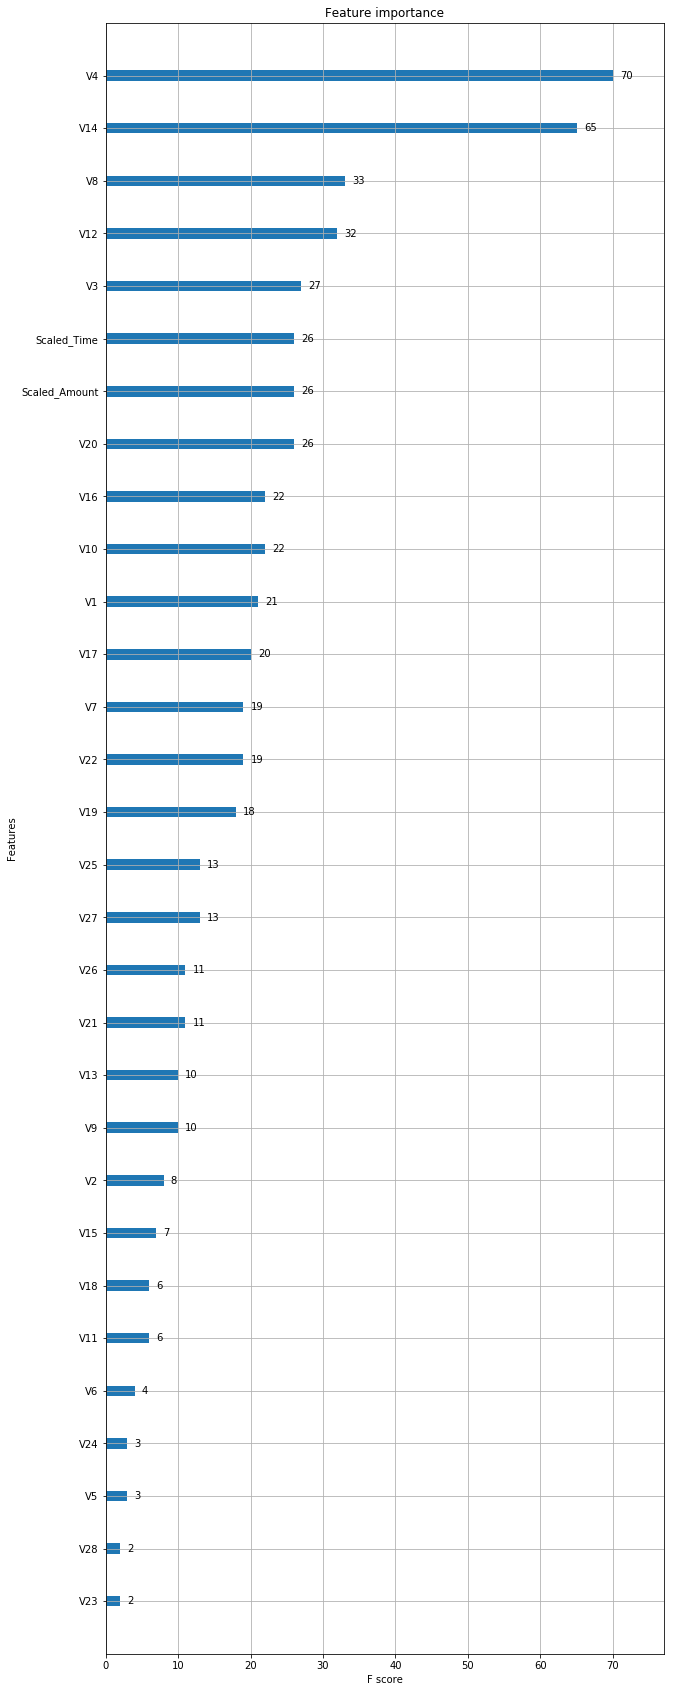

In [11]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 30))
plot_importance(xgb_clf, ax=ax)
plt.savefig('Importance_Features.png')
pyplot.show()

In [12]:
predictions = [round(value) for value in y_pred]

## 4. Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[56555   310]
 [   12    85]]


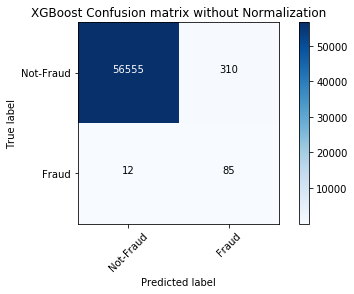

Normalized confusion matrix
[[0.99 0.01]
 [0.12 0.88]]


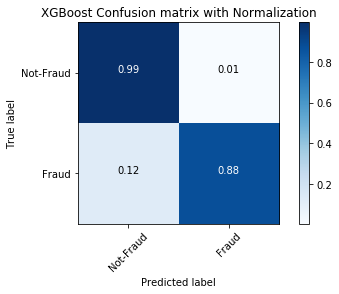

In [15]:
cm = confusion_matrix(y_val['Class'].values, y_pred)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'XGBoost Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'XGBoost Confusion matrix with Normalization')
plt.show()


## 5. Metrics Scores 

In [16]:
print(classification_report(y_val['Class'].values, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      0.99      1.00     56865
     Fraud 1       0.22      0.88      0.35        97

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [17]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9945484920425569
Specificity :  0.8762886597938144


In [18]:

acc= accuracy_score(y_val['Class'].values, predictions)
recall = recall_score( y_val['Class'].values, predictions, average='binary')
precision = precision_score( y_val['Class'].values, predictions)
f1 = f1_score( y_val['Class'].values, predictions, average='binary')
average = average_precision_score( y_val['Class'].values, predictions,)
kappa = cohen_kappa_score( y_val['Class'].values, predictions)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9943471085987149
Recall score 0.8762886597938144
Precision 0.21518987341772153
f1_score 0.34552845528455284
Average precision-recall score: 0.19
Kappa Score 0.343734017578079


In [19]:
result = pd.read_csv("../Results/model_Result_final.csv", index_col=0)

In [20]:
model_Results = pd.DataFrame([['XGBoost Classifier', acc, precision, recall, f1, average, kappa, specificity1, sensitivity1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average', 'Kappa Cohen', 'Specificity', 'Sensitivity'])

In [21]:
result.columns

Index(['Accuracy', 'Average', 'F1 Score', 'Kappa Cohen', 'Model', 'Precision',
       'Recall', 'Sensitivity', 'Specificity'],
      dtype='object')

In [22]:
x = result.append(model_Results, ignore_index=True)

In [23]:
x

,Accuracy,Average,F1 Score,Kappa Cohen,Model,Precision,Recall,Sensitivity,Specificity
0,0.996647,0.277870,0.467967,0.466641,Random Forest All Features,0.320611,0.865979,0.996870,0.865979
1,0.993908,0.174253,0.326214,0.324346,Random Forest (n=27) with OOB_9,0.200957,0.865979,0.994126,0.865979
2,0.995225,0.219926,0.387387,0.385752,Random Forest (n=35) with OOB_12,0.247839,0.886598,0.995410,0.886598
3,0.993241,0.159751,0.303797,0.301837,AdaBoost Simple Classifier,0.184211,0.865979,0.993458,0.865979
4,0.993206,0.155993,0.300181,0.298210,AdaBoost (n=15) with OOB_10,0.182018,0.855670,0.993441,0.855670
5,0.994347,0.188779,0.345528,0.343734,XGBoost Classifier,0.215190,0.876289,0.994548,0.876289
6,0.994382,0.169188,0.330544,0.328722,XGBoost Classifier Parameter Tuning,0.207349,0.814433,0.995076,0.886598
7,0.989835,0.116779,0.229028,0.226735,XGB with OOB4,0.131498,0.886598,0.990011,0.886598
8,0.995892,0.240000,0.417910,0.416402,Ensemble Classifier with best model(recall),0.275410,0.865979,0.996114,0.865979
9,0.996787,0.290000,0.478632,0.477344,Ensemble Classifier with All Models,0.330709,0.865979,0.997010,0.865979


In [24]:
x.to_csv("../Results/model_Result_final.csv")

## 6. Improve the model metric's with best thresholds

In [17]:
thresholds = sorted(xgb_clf.feature_importances_)

In [18]:
from sklearn.feature_selection import SelectFromModel

Dal treshold più piccolo al più grande

In [19]:
thresholds = sorted(xgb_clf.feature_importances_)

In [22]:
for thresh in thresholds:
    selection = SelectFromModel(xgb_clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_resampled)
    print(select_X_train.shape[1])
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_resampled)
    # eval model
    select_X_test = selection.transform(X_val)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    recall = recall_score(y_val, predictions)
    print("Thresh=%.4f, n=%d, Recall: %.2f%%" % (thresh, select_X_train.shape[1], recall*100.0))


30


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0055, n=30, Recall: 87.63%
29


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0093, n=29, Recall: 87.63%
28


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0100, n=28, Recall: 87.63%
27


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0111, n=27, Recall: 87.63%
26


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0112, n=26, Recall: 87.63%
25


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0113, n=25, Recall: 87.63%
24


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0114, n=24, Recall: 87.63%
23


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0117, n=23, Recall: 87.63%
22


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0126, n=22, Recall: 88.66%
21


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0128, n=21, Recall: 87.63%
20


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0128, n=20, Recall: 87.63%
19


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0132, n=19, Recall: 87.63%
18


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0147, n=18, Recall: 87.63%
17


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0150, n=17, Recall: 87.63%
16


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0152, n=16, Recall: 87.63%
15


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0154, n=15, Recall: 87.63%
14


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0158, n=14, Recall: 87.63%
13


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0167, n=13, Recall: 87.63%
12


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0173, n=12, Recall: 87.63%
11


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0176, n=11, Recall: 88.66%
10


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0202, n=10, Recall: 87.63%
9


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0216, n=9, Recall: 87.63%
8


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0218, n=8, Recall: 87.63%
7


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0218, n=7, Recall: 87.63%
6


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0287, n=6, Recall: 86.60%
5


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0297, n=5, Recall: 86.60%
4


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0317, n=4, Recall: 87.63%
3


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0383, n=3, Recall: 85.57%
2


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.0579, n=2, Recall: 85.57%
1
Thresh=0.4677, n=1, Recall: 81.44%


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
param_grid = {
            'n_estimators': [100, 200, 300, 400]
              }

In [30]:
from sklearn.model_selection import GridSearchCV

## 7. Parameter Tuning

In [31]:
CV_xgb = GridSearchCV(estimator=xgb_clf,
                     param_grid=param_grid,
                     scoring = 'recall',
                     verbose = 2)
CV_xgb.fit(X_train_resampled, y_train_resampled)
best_parameters = CV_xgb.best_params_
print ("The best parameteres ", best_parameters)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   0.6s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   0.6s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   0.6s
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=   0.8s
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=   0.8s
[CV] n_estimators=300 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.0s finished


The best parameteres  {'n_estimators': 300}


In [32]:
xgb_clf = xgb.XGBClassifier(n_jobs=-1, n_estimators=300)

In [33]:
xgb_clf.fit(X_train_resampled, y_train_resampled)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
y_pred = xgb_clf.predict(X_val)

In [35]:
y_score = xgb_clf.predict_proba(X_val)[:,1]

## 8. Confusion Matrix with Parameter Tuning

Confusion matrix, without normalization
[[56585   280]
 [   11    86]]


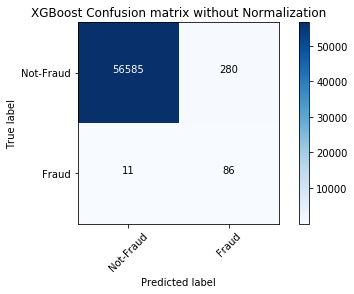

Normalized confusion matrix
[[1.   0.  ]
 [0.11 0.89]]


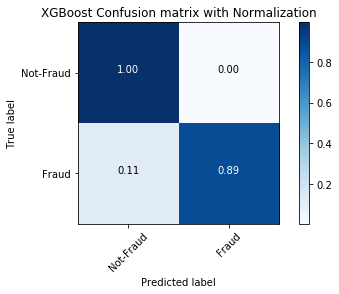

In [36]:
cm = confusion_matrix(y_val['Class'].values, y_pred)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'XGBoost Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'XGBoost Confusion matrix with Normalization')
plt.show()


In [40]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9950760573287611
Specificity :  0.8865979381443299


In [41]:

acc= accuracy_score(y_val['Class'].values, predictions)
recall = recall_score( y_val['Class'].values, predictions, average='binary')
precision = precision_score( y_val['Class'].values, predictions)
f1 = f1_score( y_val['Class'].values, predictions, average='binary')
average = average_precision_score( y_val['Class'].values, predictions,)
kappa = cohen_kappa_score( y_val['Class'].values, predictions)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.994382219725431
Recall score 0.8144329896907216
Precision 0.2073490813648294
f1_score 0.3305439330543934
Average precision-recall score: 0.17
Kappa Score 0.32872164838655726


Text(0.5,1,'Precision-Recall curve: AP=0.19')

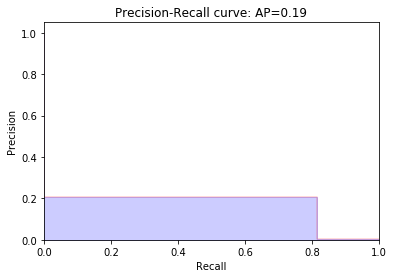

In [37]:
# plot precision-recall score


precision, recall, _ = precision_recall_curve( y_val['Class'].values, predictions)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average))

## 9. Save Results

In [42]:
result = pd.read_csv("../Results/model_Result_final.csv", index_col=0)

In [43]:
model_Results = pd.DataFrame([['XGBoost Classifier Parameter Tuning', acc, precision, recall, f1, average, kappa, specificity1, sensitivity1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average', 'Kappa Cohen', 'Specificity', 'Sensitivity'])

In [44]:
result.columns

Index(['Accuracy', 'Average', 'F1 Score', 'Kappa Cohen', 'Model', 'Precision',
       'Recall', 'Sensitivity', 'Specificity'],
      dtype='object')

In [45]:
x = result.append(model_Results, ignore_index=True)

In [46]:
x

,Accuracy,Average,F1 Score,Kappa Cohen,Model,Precision,Recall,Sensitivity,Specificity
0,0.996647,0.277870,0.467967,0.466641,Random Forest All Features,0.320611,0.865979,0.996870,0.865979
1,0.993908,0.174253,0.326214,0.324346,Random Forest (n=27) with OOB_9,0.200957,0.865979,0.994126,0.865979
2,0.995225,0.219926,0.387387,0.385752,Random Forest (n=35) with OOB_12,0.247839,0.886598,0.995410,0.886598
3,0.993241,0.159751,0.303797,0.301837,AdaBoost Simple Classifier,0.184211,0.865979,0.993458,0.865979
4,0.993206,0.155993,0.300181,0.298210,AdaBoost (n=15) with OOB_10,0.182018,0.855670,0.993441,0.855670
5,0.994347,0.188779,0.345528,0.343734,XGBoost Classifier,0.215190,0.876289,0.994548,0.876289
6,0.994382,0.169188,0.330544,0.328722,XGBoost Classifier Parameter Tuning,0.207349,0.814433,0.995076,0.886598


In [47]:
x.to_csv("../Results/model_Result_final.csv")

In [48]:
print(classification_report(y_val['Class'].values, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      1.00      1.00     56865
     Fraud 1       0.23      0.89      0.37        97

    accuracy                           0.99     56962
   macro avg       0.62      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962



## 10. Save Model

In [49]:
joblib.dump(xgb_clf, 'XGBoostBestParameters.pkl') 

['XGBoostBestParameters.pkl']